<a href="https://colab.research.google.com/github/jnramirezg/medio_continuo/blob/main/codigo/14-(3_4)-def_otras_dir(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 14. Especificación de la deformación en otras direcciones 2D (sección 3.4)

|Quién | Fecha | Qué hizo |
| ---  | ---   | ---      |
|Michael Heredia Pérez, <mherediap@unal.edu.co> | 2022-09-15 | Conversión de código de MAXIMA a Python|
|Juan Nicolás Ramírez, <jnramirezg@unal.edu.co> | 2022-09-26 | Conversión de cálculos a mano a Python |
|Juan Nicolás Ramírez, <jnramirezg@unal.edu.co> | 2022-10-05 | Simplificando cálculos |

**Notas:** 

* En este vídeo del profesor Diego Andrés Álvarez se detalla el análisis matemático previo: [video](https://youtu.be/2Ve9bJGPJco?t=845).

* El código original en MAXIMA se presenta en el ejercicio propuesto 2 (sección 3.7).

* De forma análoga, es posible demostrar las demás deformaciones $\varepsilon_{y'}$ y $\varepsilon_{x'y'}$.

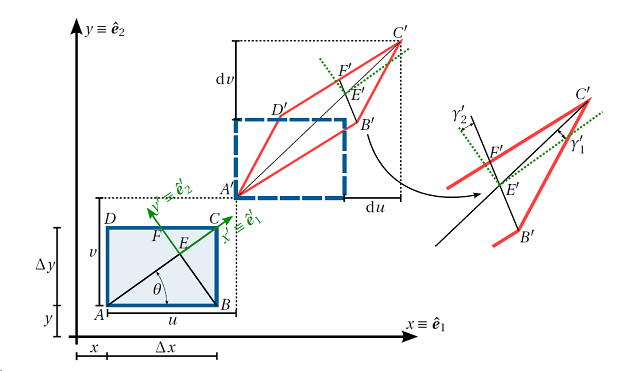

## Demostración de $\varepsilon_{x'}$

**(1) Importamos las funciones de la librería ```sympy```:**

In [1]:
from sympy import *

**(2) Especificamos las variables simbólicas**

```x``` representa la coordenada $x$ y ```y``` representa la coordenada $y$.

```ds``` representa $\Delta_s$ (la distancia $AC$), ```t``` representa el ángulo $\theta$.

```ex```, ```ey``` y ```exy``` representan las componentes de deformación $\varepsilon_x$, $\varepsilon_y$ y $\varepsilon_{xy}$ respectivamente.

```e_xp``` representa la deformación en la dirección $x'$ en el n $\varepsilon_{x'}$

```u``` representa $u(x,y)$ y ```v``` representa $v(x,y)$

In [2]:
x, y = symbols("x y")
ds, t = symbols("Delta_s theta")
ex, ey, exy = symbols("varepsilon_x varepsilon_y varepsilon_xy")
e_xp = symbols("varepsilon_x'")
g1, g2 = symbols('gamma_1 gamma_2')
u, v = symbols('u v')

**(3) Establecemos las ecuaciones que permiten calcular $\varepsilon_x$**

- Por definición:

$\varepsilon_{x'}=\displaystyle\lim_{AC \to0}\frac{A'C' - AC}{AC}$

Es decir,

$\varepsilon_{x'}=\displaystyle\lim_{\Delta_s \to0}\frac{A'C' - \Delta_s}{\Delta_s}$

De donde despejamos $A'C'$:

$A'C'=(1+\varepsilon_{x'})\Delta_s$


Y calculando $A'C'^2$:

$A'C'=\left((1+\varepsilon_{x'})\Delta_s\right)^2$ (<font color='blue'>1</font>)

**Nota:** (<font color='blue'>1</font>) es válida siempre y cuando $\Delta_s\to0$.

- De acuerdo con la ecuación de distancia entre dos puntos:

$A'C'^2=(\color{blue}{C'_x}-\color{green}{A'_x})^2+(\color{blue}{C'_y}-\color{green}{A'_y})^2$ (<font color='blue'>2</font>)

Igualamos (<font color='blue'>1</font>) y (<font color='blue'>2</font>):

$$ \left ( (1+\varepsilon_{x'})\Delta_s  \right )^2 = (\color{blue}{C'_x}-\color{green}{A'_x})^2+(\color{blue}{C'_y}-\color{green}{A'_y})^2  $$

E igualamos a cero:

$$ \left ( (1+\varepsilon_{x'})\Delta_s  \right )^2 - (\color{blue}{C'_x}-\color{green}{A'_x})^2-(\color{blue}{C'_y}-\color{green}{A'_y})^2=0 $$

**(4) Definimos las coordenadas de los puntos $A'$ y $C'$:**

$A':=\left(\color{blue}{A'_x}, \color{green}{A'_y}\right)$ 

$C':=\left(\color{blue}{C'_x}, \color{green}{C'_y}\right)$ 

Donde:

$\color{blue}{A'_x}=x + u(x,y)$ (<font color='blue'>3</font>)

$\color{green}{A'_y}=y + v(x,y)$ (<font color='blue'>4</font>)

$\color{blue}{C'_x}=x + \Delta_x + \underbrace{u(x,y) + \color{red}{\displaystyle\frac{\partial u}{\partial x}(x,y)}\Delta_x + \color{red}{\displaystyle\frac{\partial u}{\partial y}(x,y)}\Delta_y}_{u(x+\Delta_x,y+\Delta_y)} = x + \Delta_x + u(x,y) + \color{red}{\varepsilon_x}\Delta_x + \color{red}{\gamma_2}\Delta_y$ (<font color='blue'>5</font>)

$\color{green}{C'_y}=y + \underbrace{v(x,y)+\color{red}{\displaystyle\frac{\partial v}{\partial x}(x,y)}\Delta_x + \color{red}{\displaystyle\frac{\partial v}{\partial y}(x,y)}\Delta_y}_{v(x+\Delta_x,y+\Delta_y)}= y + \Delta_y + v(x,y) + \color{red}{\gamma_1}\Delta_x + \color{red}{\varepsilon_y}\Delta_y$ (<font color='blue'>6</font>)

**Nota:** $u(x+\Delta_x,y+\Delta_y)$ y $v(x+\Delta_x,y+\Delta_y)$ se determinaron mediante expansiones de series de Taylor en varias variables de primer orden. Las derivadas parciales de ordenes superiores son despreciables gracias a la hipótesis de pequeñas deformaciones.

**(5) Los términos señalados en <font color='red'>rojo</font> corresponen a definiciones hechas previamente, estas son:**

$\varepsilon_x=\displaystyle\frac{\partial u}{\partial x} {\left(x,y \right)}$, 
$\varepsilon_y=\displaystyle\frac{\partial v}{\partial y} {\left(x,y \right)}$, 
$\gamma_1=\displaystyle\frac{\partial v}{\partial x} {\left(x,y \right)}$, 
$\gamma_2=\displaystyle\frac{\partial u}{\partial y} {\left(x,y \right)}$

Definimos los diferenciales $\Delta x$ y $\Delta y$ en función de la geometría y el ángulo $\theta$, teniendo en cuenta que $AC = \Delta_s$

In [3]:
dx = ds*cos(t)
dy = ds*sin(t)

Definios simbólicamente las ecuaciones <font color='blue'>3</font>, <font color='blue'>4</font>, <font color='blue'>5</font> y <font color='blue'>6</font>:

In [4]:
Apx = x + u  
Apy = y + v
Cpx = x + dx + u + ex*dx + g2*dy  
Cpy = y + dy + v + g1*dx + ey*dy

**(6) Escribimos en términos de nuestra variables en ```Python``` la ecuación:**

$$ \left ( (1+\varepsilon_{x'})\Delta_s  \right )^2 - (\color{blue}{C'_x}-\color{green}{A'_x})^2-(\color{blue}{C'_y}-\color{green}{A'_y})^2=0 $$

In [5]:
((1+e_xp)*ds)**2 - (Cpx-Apx)**2 - (Cpy-Apy)**2 

Delta_s**2*(varepsilon_x' + 1)**2 - (Delta_s*gamma_1*cos(theta) + Delta_s*varepsilon_y*sin(theta) + Delta_s*sin(theta))**2 - (Delta_s*gamma_2*sin(theta) + Delta_s*varepsilon_x*cos(theta) + Delta_s*cos(theta))**2

**(7) Observamos que el término $\Delta_s^2$ se repite en todos los términos, así que la podemos factorizar y cancelar:**

$\displaystyle \color{red}{\Delta_{s}^{2}} \left(\varepsilon_{x'} + 1\right)^{2} - \left(\color{red}{\Delta_{s}} \gamma_{1} \cos{\left(\theta \right)} + \color{red}{\Delta_{s}} \varepsilon_{y} \sin{\left(\theta \right)} + \color{red}{\Delta_{s}} \sin{\left(\theta \right)}\right)^{2} - \left(\color{red}{\Delta_{s}} \gamma_{2} \sin{\left(\theta \right)} + \color{red}{\Delta_{s}} \varepsilon_{x} \cos{\left(\theta \right)} + \color{red}{\Delta_{s}} \cos{\left(\theta \right)}\right)^{2}=0$

In [6]:
expand(_/(ds**2))

-gamma_1**2*cos(theta)**2 - 2*gamma_1*varepsilon_y*sin(theta)*cos(theta) - 2*gamma_1*sin(theta)*cos(theta) - gamma_2**2*sin(theta)**2 - 2*gamma_2*varepsilon_x*sin(theta)*cos(theta) - 2*gamma_2*sin(theta)*cos(theta) - varepsilon_x**2*cos(theta)**2 - 2*varepsilon_x*cos(theta)**2 + varepsilon_x'**2 + 2*varepsilon_x' - varepsilon_y**2*sin(theta)**2 - 2*varepsilon_y*sin(theta)**2 - sin(theta)**2 - cos(theta)**2 + 1

**(8) Aplicamos la hipótesis de deformaciones pequeñas:**
Los términos en rojo son aproxiamadamente cero gracias a la hipótesis de deformaciones pequeñas, que si se elevan al cuadrado son mucho más pequeñas que las deformaciones elevadas a la uno. Mediante la función ```.subs()``` de ```sympy``` reemplazamos con ceros:

$\displaystyle - \underbrace{\color{red}{\gamma_{1}^{2}}}_{=0} \cos^{2}{\left(\theta \right)} - 2 \underbrace{\color{red}{\gamma_{1} \varepsilon_{y}}}_{=0} \sin{\left(\theta \right)} \cos{\left(\theta \right)} - 2 \gamma_{1} \sin{\left(\theta \right)} \cos{\left(\theta \right)} - \underbrace{\color{red}{\gamma_{2}^{2}}}_{=0} \sin^{2}{\left(\theta \right)} - 2 \underbrace{\color{red}{\gamma_{2} \varepsilon_{x}}}_{=0} \sin{\left(\theta \right)} \cos{\left(\theta \right)} - 2 \gamma_{2} \sin{\left(\theta \right)} \cos{\left(\theta \right)} - \underbrace{\color{red}{\varepsilon_{x}^{2}}}_{=0} \cos^{2}{\left(\theta \right)} - 2 \varepsilon_{x} \cos^{2}{\left(\theta \right)} + \underbrace{\color{red}{\varepsilon_{x'}^{2}}}_{=0} + 2 \varepsilon_{x'} - \underbrace{\color{red}{\varepsilon_{y}^{2}}}_{=0} \sin^{2}{\left(\theta \right)}- 2 \varepsilon_{y} \sin^{2}{\left(\theta \right)} - \sin^{2}{\left(\theta \right)} - \cos^{2}{\left(\theta \right)} + 1=0$

In [7]:
_.subs([(g1**2, 0), (g1*ey, 0), (g2**2, 0), (g2*ex, 0), (ex**2, 0), (e_xp**2, 0), (ey**2, 0)])

-2*gamma_1*sin(theta)*cos(theta) - 2*gamma_2*sin(theta)*cos(theta) - 2*varepsilon_x*cos(theta)**2 + 2*varepsilon_x' - 2*varepsilon_y*sin(theta)**2 - sin(theta)**2 - cos(theta)**2 + 1

**(9) Despejamos $\varepsilon_{x'}$ almacenado simbólicamente como ```e_xp```, con la función ```sympy.solve()```:**

In [8]:
solve(_, e_xp)[0]

gamma_1*sin(2*theta)/2 + gamma_2*sin(2*theta)/2 + varepsilon_x*cos(2*theta)/2 + varepsilon_x/2 - varepsilon_y*cos(2*theta)/2 + varepsilon_y/2

**(10) Factorizamos $\sin(2\theta)$ y $\cos(2\theta)$:**

In [9]:
factor(_, sin(2*t), cos(2*t))

(varepsilon_x + varepsilon_y + (gamma_1 + gamma_2)*sin(2*theta) + (varepsilon_x - varepsilon_y)*cos(2*theta))/2

**(11) Previamente, habíamos definido $\varepsilon_{xy}=\gamma_1 + \gamma_2$, por lo que reemplazamos:**

In [10]:
_.subs((g1+g2), 2*exy)

varepsilon_x/2 + varepsilon_xy*sin(2*theta) + varepsilon_y/2 + (varepsilon_x - varepsilon_y)*cos(2*theta)/2

Obteniendo:
$$\varepsilon_{x'}(\theta) = \displaystyle\frac{\varepsilon_x +\varepsilon_y}{2} + \displaystyle\frac{\varepsilon_x-\varepsilon_y}{2} \cos(2\theta)+ \varepsilon_{xy}\sin(2\theta)$$

Que alternativamente la podemos escribir:
$$\varepsilon_{x'}(\theta) =
\cos^{2}{\left(\theta \right)} \varepsilon_x +\sin^{2}{\left(\theta \right)} \varepsilon_y + 2\sin{\left(\theta \right)} \cos{\left(\theta \right)} \varepsilon_{xy}
$$

---

De forma análoga, es posible demostrar las demás deformaciones $\varepsilon_{y'}$ y $\varepsilon_{x'y'}$:

$$\varepsilon_{y'}(\theta) =
\sin^{2}{\left(\theta \right)} \color{blue}{\varepsilon_x}
+\cos^{2}{\left(\theta \right)} \color{blue}{\varepsilon_y} 
- 2\sin{\left(\theta \right)} \cos{\left(\theta \right)} \color{blue}{\varepsilon_{xy}}
$$

$$\varepsilon_{x'y'}(\theta) =
\sin{\left(\theta \right)}\cos{\left(\theta \right)} \color{blue}{\varepsilon_x}
-\sin{\left(\theta \right)}\cos{\left(\theta \right)}\color{blue}{\varepsilon_y} 
+ \left(\cos{\left(\theta \right)}^2-\sin{\left(\theta \right)}^2\right)\color{blue}{\varepsilon_{xy}}
$$